In [13]:
import glob
from IPython.display import display, Image
import os

In [14]:
results_dir = 'test/data/roundings/'
max_images = 2
IMG_END = '_pred_instances.png'

Found 1 predictions
frankfurt_000000_000294_pred_instances.png


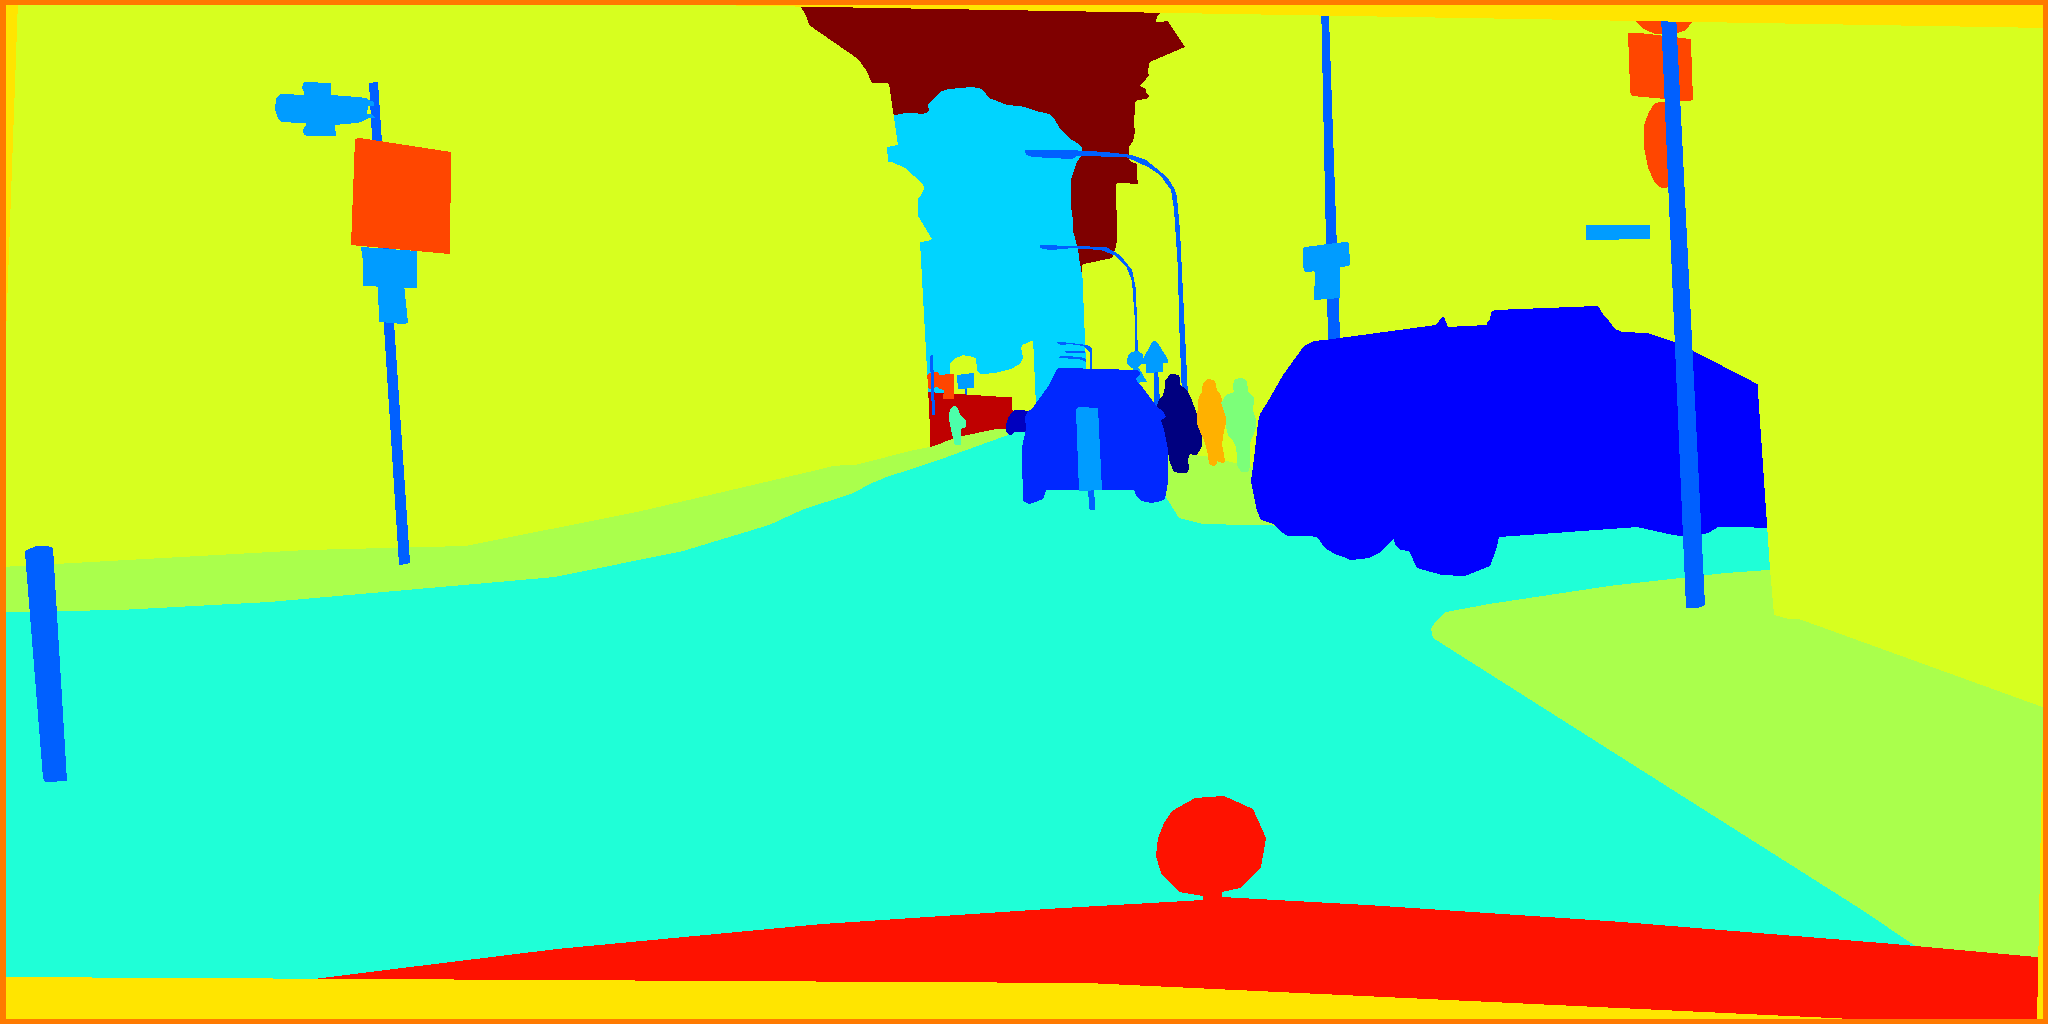

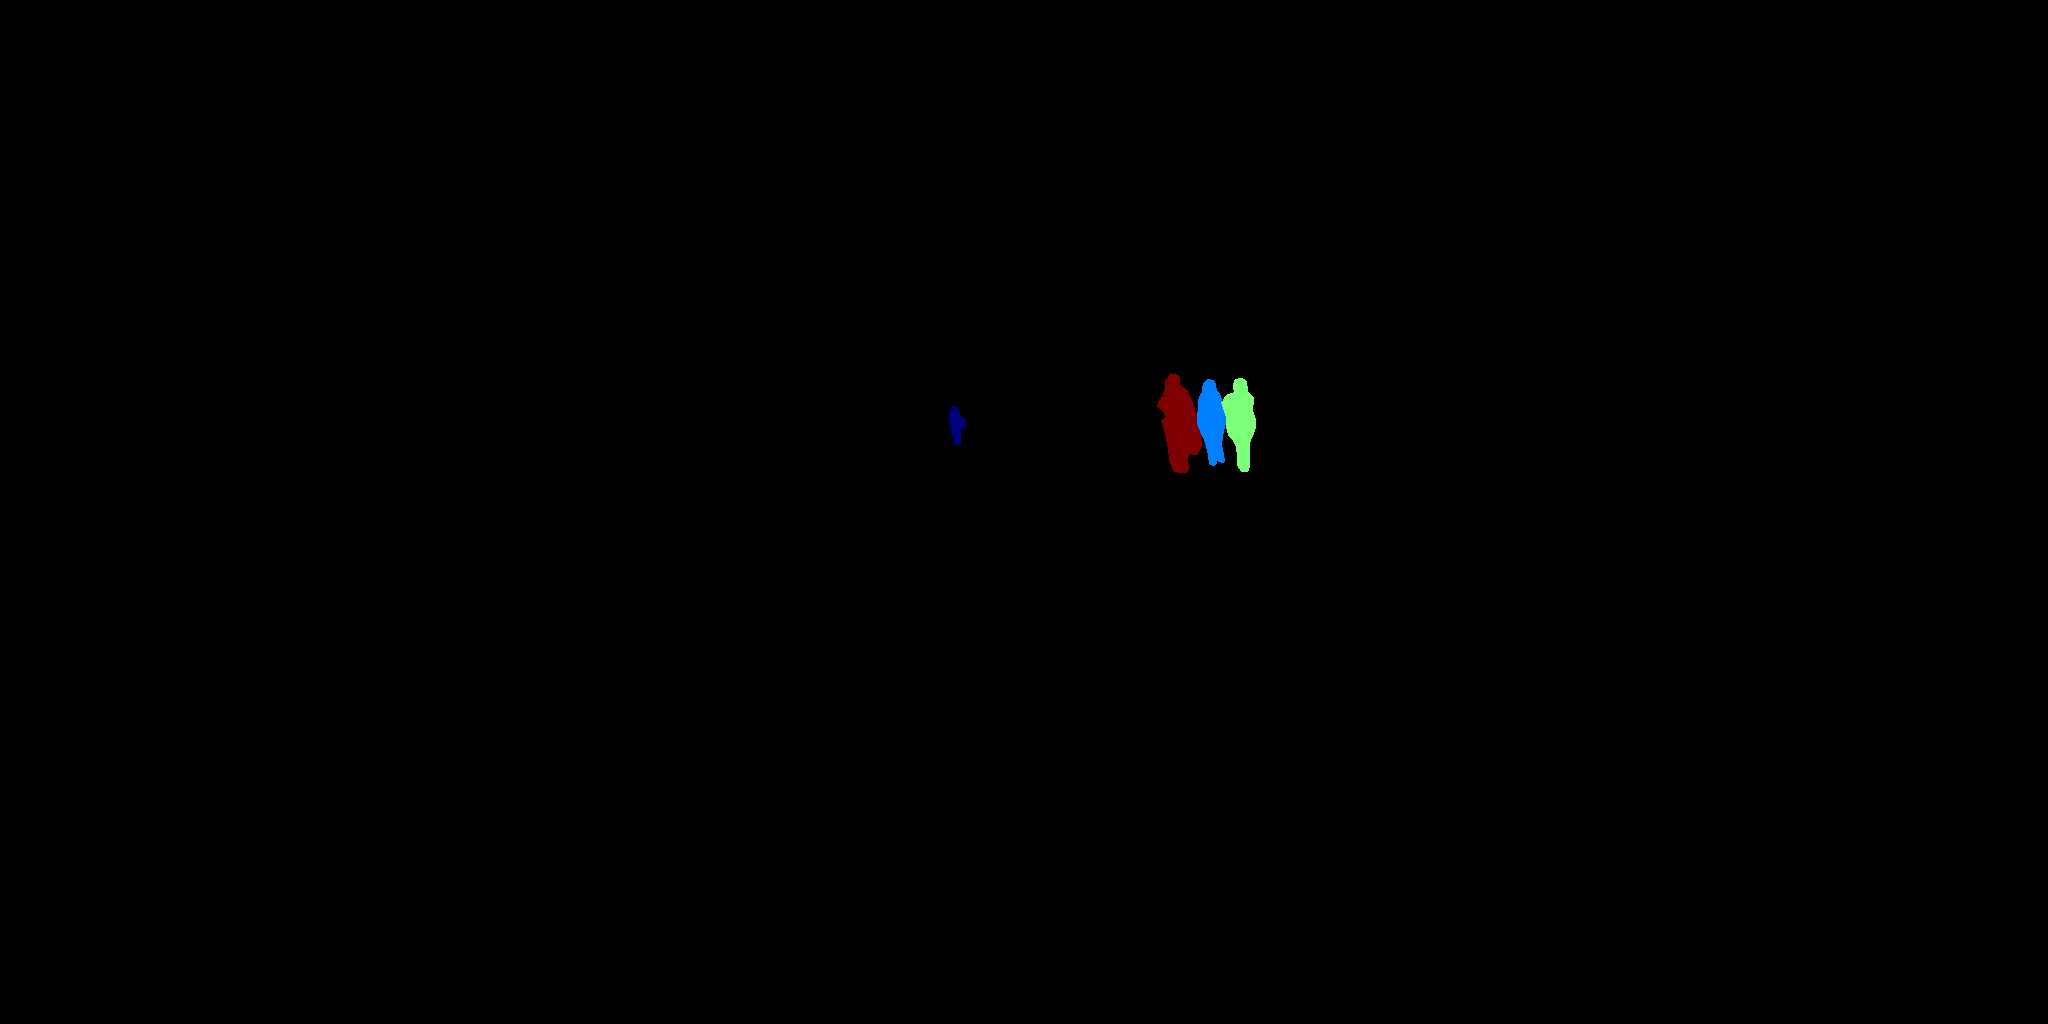

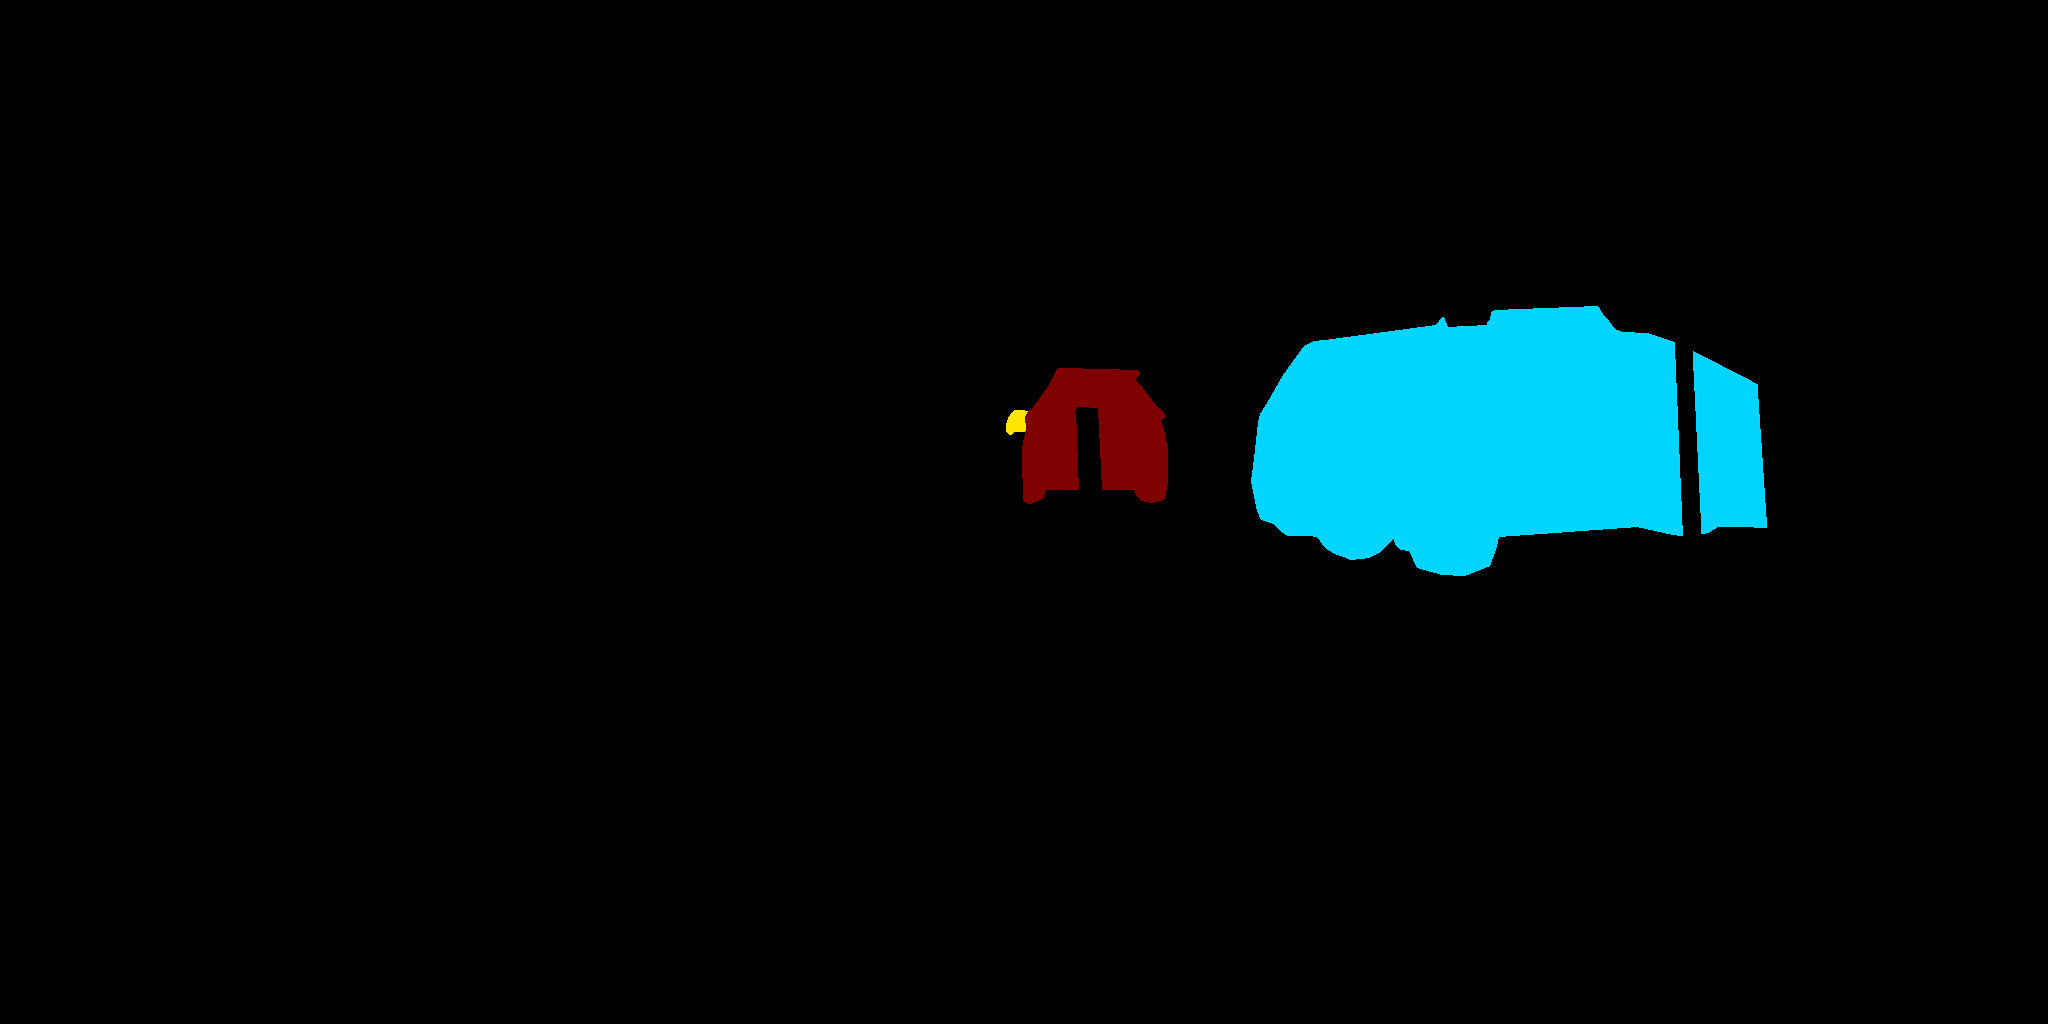

In [17]:
# Gather all image paths
full_color_path_list = glob.glob(os.path.join(results_dir, '*{}'.format(IMG_END)))
print('Found {} predictions'.format(len(full_color_path_list)))

for full_color_path in full_color_path_list[0:min(len(full_color_path_list), max_images)]:
    print os.path.basename(full_color_path)
    display(Image(full_color_path))
    
    # Display individual semantic classes
    for semantic_path in glob.glob(full_color_path.rstrip(IMG_END) + '_semantic_*'):
         display(Image(semantic_path))